Import data from csv file

In [2]:
pip install -U scikit-learn

  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
Note: you may need to restart the kernel to use updated packages.


In [190]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [191]:
df = pd.read_csv('BigMartSales.csv')

In [192]:
df.shape

(8523, 12)

In [193]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [194]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df = df.apply(lambda col: pd.factorize(col, sort=True)[0])

In [195]:
df.shape

(4650, 12)

In [196]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,154,279,1,395,4,3582,4,2,1,0,0,1886
1,8,56,2,512,14,295,1,4,1,2,1,152
2,656,369,1,421,10,1874,4,2,1,0,0,1161
4,1277,261,1,0,9,391,0,0,0,2,0,506
5,750,291,2,0,0,354,1,4,1,2,1,224


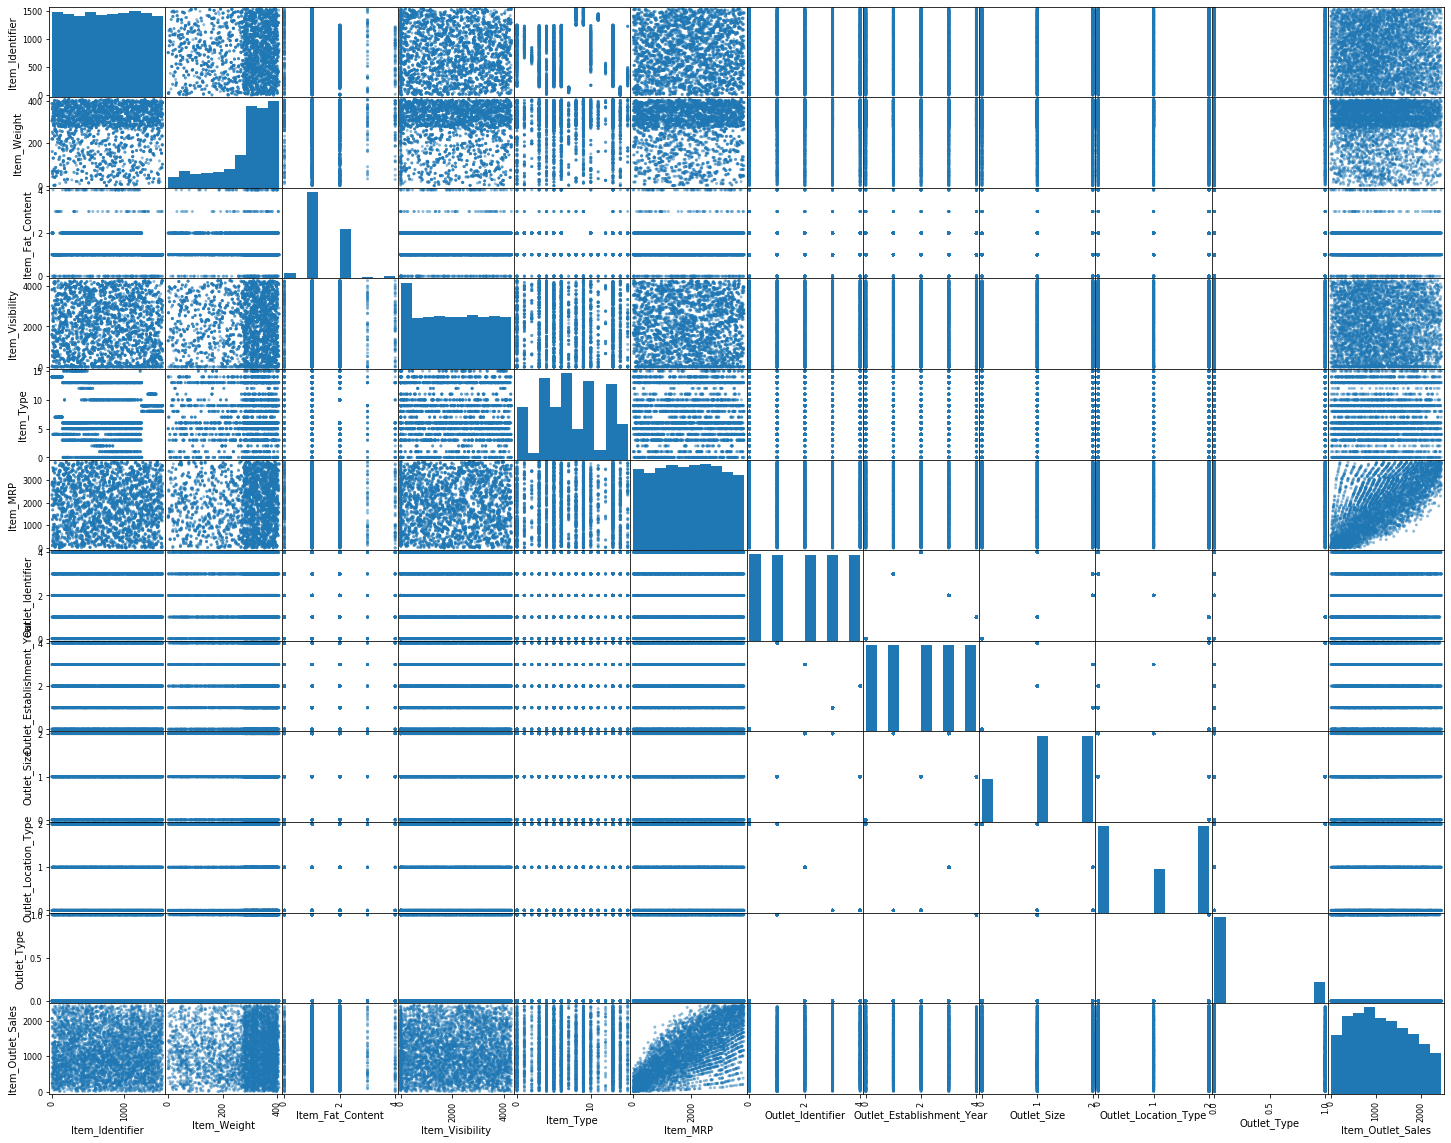

Current size: [25.0, 20.0]


In [224]:
# QC dataset by plotting each feature against each other

from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

# Change the size of scatter plot
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 # Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.show()


The Item_Outlet_Sales feature has good correlation with Item_MRP and Item_Weight. It does not show any correlation with other features.

Spliting dataset into training and testing set

In [232]:
X = df[['Item_MRP', 'Item_Weight']]

Y = df['Item_Outlet_Sales'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0 )

Creating a linear regression object and fit it with our training set

In [233]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the result using testing set

In [234]:
Y_pred = lr.predict(X_test)
Y_pred

array([[1845.07995591],
       [ 596.39897366],
       [1439.40318178],
       ...,
       [ 408.82801395],
       [ 522.25398156],
       [ 336.13735432]])

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [235]:
output = pd.DataFrame({'Actual':Y_test.flatten(), 'Prediction':Y_pred.flatten()})
output

,Actual,Prediction
0,1254,1845.079956
1,711,596.398974
2,107,1439.403182
3,829,1350.930070
4,602,1303.437221
5,622,1626.081882
6,1262,977.763662
7,483,576.714967
8,776,1077.703657
9,2273,1647.984432


In [236]:
# Print out the statistics
lr.score(X,Y)

0.49796038992832325

In [237]:
lr.coef_

array([[ 0.41979045, -0.13061573]])

In [238]:
lr.intercept_

array([372.06770609])